In [147]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words
import numpy as np
from sklearn.model_selection import train_test_split

In [150]:
def stem(word):
    # sno = nltk.stem.SnowballStemmer('english')
    ps = WordNetLemmatizer()
    stem = ps.lemmatize(word)
    print(stem)
    if stem in words.words():
        return stem
    else:
        return word
stem("p")

pausing


'pausing'

In [108]:
# text = """Once upon a time, in a land far away, there lived a boy named John. John was a brave lad who loved adventure. He lived in a small village surrounded by tall mountains and lush forests. Every day, he would explore the woods, searching for hidden treasures and new discoveries.

# One sunny morning, as John ventured deeper into the forest, he stumbled upon a mysterious cave. The cave was dark and ominous, but John's curiosity got the better of him. With a torch in hand, he bravely stepped inside.

# Inside the cave, John found a narrow passage leading to a large chamber. In the center of the chamber, illuminated by a beam of light streaming in from a hole in the ceiling, was a magnificent treasure chest.

# Heart racing with excitement, John approached the chest. He reached out and slowly lifted the lid. Inside, gleaming in the dim light, were jewels of every color imaginable. Diamonds, rubies, emeralds – they sparkled like stars in the night sky.

# But among the jewels, John noticed something else – a dusty old book. It looked ancient, with weathered pages and faded writing. Curious, he picked it up and began to read.

# As he turned the pages, John realized that the book was a map – a map to a hidden kingdom beyond the mountains. According to the ancient text, the kingdom was filled with untold riches and wonders beyond imagination.

# Determined to find this kingdom, John set out on a quest. He packed his belongings, bid farewell to his village, and began his journey into the unknown.

# For days, John traveled through dense forests and treacherous mountains. He faced wild beasts and fierce storms, but he pressed on, driven by the promise of adventure.

# Finally, after weeks of travel, John reached the foot of the mountains. With a determined spirit, he began the arduous climb to the summit.

# At last, after days of climbing, John reached the top of the mountain. And there, stretching out before him, was the hidden kingdom.

# It was more magnificent than he could have ever imagined. Towering castles rose into the sky, surrounded by lush gardens and shimmering lakes. And everywhere he looked, there were treasures beyond counting – gold, silver, precious gems – all waiting to be discovered.

# But as John explored the kingdom, he realized that its true beauty lay not in its riches, but in its people. They welcomed him with open arms, sharing their stories and traditions.

# And so, John lived in the hidden kingdom, surrounded by friends and wonders beyond imagination. And though his journey had been long and perilous, he knew that it had been worth every step.

# For in the end, it was not the treasures he found that mattered most, but the adventures he had along the way. And as he watched the sun set behind the mountains, painting the sky with hues of pink and gold, John knew that he had found his true home."""
text = """Once upon a time, in a small village, there was a boy named Tim. Tim lived with his family in a cozy house near a big tree. Every day, Tim played with his friends, ran in the fields, and helped his parents. Life was simple but joyful.

One sunny day, Tim found a shiny stone by the river. He picked it up and showed it to his friends. They all admired its beauty. Tim decided to keep the stone as a treasure.

Days passed, and Tim noticed something peculiar. Whenever he held the stone, he felt a strange warmth spreading through him. It made him feel courageous and wise.

Tim's parents noticed the change in him. They asked about the stone. Tim explained its magic to them. They were amazed but warned him to use its power wisely.

One stormy night, a traveler came to the village seeking shelter. He told tales of a distant kingdom plagued by darkness. Tim listened intently, feeling the urge to help.

The next morning, Tim announced his decision to his parents. He would embark on a journey to the distant kingdom and use the magic of the stone to bring light and hope.

His parents were proud but worried. They hugged him tightly, wishing him luck. Tim set off with determination in his heart.

The journey was long and perilous. Tim faced many challenges along the way. But whenever he felt scared or lost, he held onto the stone, drawing strength from its warmth.

Finally, after many days of travel, Tim reached the kingdom. It was indeed shrouded in darkness and despair. But Tim refused to give up hope. He stood in the town square, holding the stone high above his head.

As if by magic, the stone began to glow with a brilliant light. It spread across the kingdom, banishing the darkness and bringing joy to the people.

Tim's bravery and kindness had saved the kingdom. He became a hero, beloved by all. And though he eventually returned home, the memory of his adventure and the magic of the stone stayed with him forever.

From that day on, Tim lived a happy life, always grateful for the simple stone that had changed everything. And the village, once again, knew peace and prosperity, thanks to the boy with the extraordinary heart.

Tim's fame spread far and wide. People came from distant lands to hear his story and see the magical stone. He became a symbol of hope and inspiration.

Years passed, and Tim grew into a wise and respected man. He continued to use the stone's power for good, helping those in need and spreading kindness wherever he went.

One day, a messenger arrived from a neighboring kingdom. They were facing their own troubles and begged Tim for help. Without hesitation, Tim agreed to assist them.

He embarked on another journey, this time accompanied by a group of loyal friends. Together, they traveled across mountains and forests, facing danger at every turn.

But Tim remained undeterred. He knew that with the magic of the stone and the support of his friends, they could overcome any obstacle.

Finally, they reached the troubled kingdom. It was even worse than Tim had imagined. The people were starving, and their homes lay in ruins.

Once again, Tim stood in the town square, holding the stone aloft. Its light shone brighter than ever before, filling the kingdom with hope and promise.

With Tim's guidance, the people began to rebuild their lives. They worked together tirelessly, united by a common goal.

Months passed, and the kingdom was transformed. Where there was once darkness, there was now light. And it was all thanks to Tim and his extraordinary stone.

But Tim knew that his work was not yet done. There were still others in need of his help, other kingdoms waiting to be saved.

So he bid farewell to the grateful people and set off once again, ready to face whatever challenges lay ahead.

And as he journeyed into the unknown, Tim knew that as long as he had the magic stone and the love of his friends, he could overcome anything.

For he was not just a hero; he was a beacon of hope in a world that sorely needed it. And his story would live on, inspiring generations to come."""
text = " ".join([part.strip() for part in text.split("\n")])
len(text)

4049

In [155]:
text = word_tokenize("And now for something completely different")
nltk.pos_tag(text)
# [('And', 'CC'), ('now', 'RB'), ('for', 'IN'), ('something', 'NN'),
# ('completely', 'RB'), ('different', 'JJ')]
nltk.help.upenn_tagset('NN.*')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [119]:
corpus = []

individual_words = word_tokenize(text)
while "." in individual_words:
    individual_words.remove(".")
while "," in individual_words:
    individual_words.remove(",")
while ";" in individual_words:
    individual_words.remove(";")
for i in range(len(individual_words)):
    word = individual_words[i]
    stemmed = stem(word).lower()
    individual_words[i] = stemmed
    if stemmed not in corpus:
        corpus.append(stemmed)

print(corpus)
len(corpus)

['once', 'upon', 'a', 'time', 'in', 'small', 'village', 'there', 'wa', 'boy', 'name', 'tim', 'live', 'with', 'hi', 'family', 'cozy', 'house', 'near', 'big', 'tree', 'every', 'day', 'play', 'friend', 'ran', 'the', 'field', 'and', 'help', 'parent', 'life', 'simple', 'but', 'joy', 'one', 'sunny', 'found', 'shiny', 'stone', 'by', 'river', 'he', 'pick', 'it', 'up', 'show', 'to', 'they', 'all', 'admired', 'beauti', 'decided', 'keep', 'as', 'treasure', 'pass', 'noticed', 'something', 'peculiar', 'whenever', 'held', 'felt', 'strang', 'warmth', 'spread', 'through', 'him', 'made', 'feel', 'courageous', 'wise', "'s", 'chang', 'ask', 'about', 'explain', 'magic', 'them', 'were', 'amazed', 'warn', 'use', 'power', 'stormy', 'night', 'travel', 'came', 'seek', 'shelter', 'told', 'tale', 'of', 'distant', 'kingdom', 'plagued', 'dark', 'listen', 'intent', 'urge', 'next', 'morn', 'announced', 'decision', 'would', 'embark', 'on', 'journey', 'bring', 'light', 'hope', 'proud', 'worried', 'hug', 'tightly', 'wi

282

In [120]:
word_dict = {}
for i in range(len(corpus)):
    word_dict[corpus[i]] = [1.0 if j == i else 0.0 for j in range(len(corpus))]
# word_dict

In [121]:
class Net(nn.Module):

    def __init__(self, in_len):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(in_len, 8) #to embedding layer (the internal representation of the input word)
        self.fc2 = nn.Linear(8, 2*in_len) #to output (word before, word after)
    def forward(self, x):
        # x = F.relu(self.fc1(x))
        x = F.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x
    def embeddings(self, x):
        x = self.fc1(x)
        return x
    def loss_score(self, x, y):
        l = 0
        for i in range(len(x)):
            output = self(x[i])
            target = y[i]
            criterion_temp = nn.MSELoss()
            loss = criterion_temp(output, target)
            l += loss.item()/len(x)
        return l

In [122]:
net = Net(len(corpus))
net

Net(
  (fc1): Linear(in_features=282, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=564, bias=True)
)

In [123]:
params = list(net.parameters())

net.zero_grad()

criterion = nn.MSELoss()

In [124]:
x = []
y = []
for i in range(1,len(individual_words)-1):
    x.append(torch.tensor(word_dict[individual_words[i]]))
    y.append(torch.tensor(word_dict[individual_words[i-1]] + word_dict[individual_words[i+1]]))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
len(x)

724

In [129]:
# create your optimizer
losses = []
optimizer = optim.SGD(net.parameters(), lr=0.1)
NUM_RUNS = 100
for run_num in range(NUM_RUNS):
    print("RUN", str(run_num)+"/"+str(NUM_RUNS), end=": ")
    for i in range(len(x_train)):
        if i % (len(x_train)//20) == 0:
            print("•", end="")

        input = x_train[i]
        target = y_train[i]  # a dummy target, for example
        # target = target.view(1, -1)  # make it the same shape as output
        # in your training loop:
        optimizer.zero_grad()   # zero the gradient buffers
        output = net(input)
        loss = criterion(output, target)
        losses.append(loss.item())
        loss.backward()
        optimizer.step()    # Does the update
    print()

RUN 0/100: •••••••••••••••••••••
RUN 1/100: •••••••••••••••••••••
RUN 2/100: •••••••••••••••••••••
RUN 3/100: •••••••••••••••••••••
RUN 4/100: •••••••••••••••••••••
RUN 5/100: •••••••••••••••••••••
RUN 6/100: •••••••••••••••••••••
RUN 7/100: •••••••••••••••••••••
RUN 8/100: •••••••••••••••••••••
RUN 9/100: •••••••••••••••••••••
RUN 10/100: •••••••••••••••••••••
RUN 11/100: •••••••••••••••••••••
RUN 12/100: •••••••••••••••••••••
RUN 13/100: •••••••••••••••••••••
RUN 14/100: •••••••••••••••••••••
RUN 15/100: •••••••••••••••••••••
RUN 16/100: •••••••••••••••••••••
RUN 17/100: •••••••••••••••••••••
RUN 18/100: •••••••••••••••••••••
RUN 19/100: •••••••••••••••••••••
RUN 20/100: •••••••••••••••••••••
RUN 21/100: •••••••••••••••••••••
RUN 22/100: •••••••••••••••••••••
RUN 23/100: •••••••••••••••••••••
RUN 24/100: •••••••••••••••••••••
RUN 25/100: •••••••••••••••••••••
RUN 26/100: •••••••••••••••••••••
RUN 27/100: •••••••••••••••••••••
RUN 28/100: •••••••••••••••••••••
RUN 29/100: ••••••••••••

0.003522673486892519


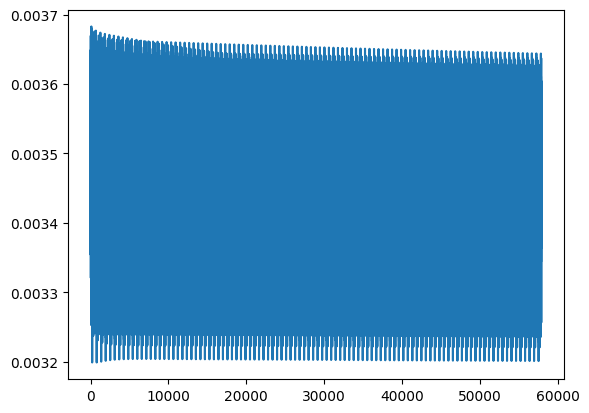

In [130]:
N_test = 100

print(net.loss_score(x_test, y_test))

plt.plot(losses)
plt.show()

In [131]:
def words_around(word):
    return net(word)

l = words_around(torch.tensor(word_dict["live"]))
l1 = l[:len(l)//2]
# l1 = l[len(l)//2:]
max_index = -1
for i in range(len(l1)):
    if l1[i] >= l1[max_index]:
        max_index = i
print(corpus[max_index])
print(l1[max_index].item())

the
0.05753900110721588


In [144]:
def embeddings(word):
    return [v.item() for v in net.embeddings(torch.tensor(word_dict[word]))]
def cos_similarity(a, b):
    s = 0
    for i in range(len(a)):
        s += a[i] * b[i]
    s /= sum(e**2 for e in a)**0.5
    s /= sum(e**2 for e in b)**0.5
    return s
emb = [embeddings(word) for word in corpus]
ref = embeddings("noticed")
min_i = -1
for i in range(len(corpus)):
    s = cos_similarity(emb[i], ref)
    if s != 0 and s <= cos_similarity(emb[min_i], ref):
        min_i = i
print(corpus[min_i])


ask
